In [28]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from xgboost import XGBClassifier

In [29]:
# dataset= pd.read_csv(r"D:\target\ml\survivalPredictionTitanic\dataset\Titanic-Dataset.csv")

In [30]:
# dataset.head()

In [31]:
# dataset.shape

In [32]:
# dataset=dataset.drop(columns=['Name','Cabin','Ticket','PassengerId'])

In [33]:
# dataset.head()

In [34]:
# dataset.value_counts('Survived')

In [35]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd


# le = LabelEncoder()
# dataset['Sex']=dataset['Sex'].replace({'male':1,'female':0})
# dataset['Embarked']=dataset['Embarked'].replace({'C':1,'Q':2,'S':0})
# # Drop rows where 'Age' is NaN
# # Drop rows where any of the 'Sex', 'Age', or 'Embarked' columns contain NaN values
# dataset = dataset.dropna(subset=['Sex', 'Age', 'Embarked'])

# # Verify the changes
# print(dataset[['Sex', 'Age', 'Embarked']].head())

In [36]:
# dataset.head(20)

In [37]:
# X=dataset.drop(columns='Survived')
# Y=dataset['Survived']
# X.head()

In [38]:
# Y.head()

In [39]:
# X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [40]:


# # Hyperparameter Tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'min_child_weight': [1, 3, 5]
# }

# grid_search = GridSearchCV(
#     estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=3,
#     verbose=1
# )

# grid_search.fit(X_train, Y_train)
# best_model = grid_search.best_estimator_

# # Evaluate the best model
# y_pred_best = best_model.predict(X_test)
# accuracy_best = accuracy_score(Y_test, y_pred_best)
# print(f"Optimized Accuracy: {accuracy_best * 100:.2f}%")
# print("\nClassification Report:\n", classification_report(Y_test, y_pred_best))
# print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_best))

# # Feature Importance
# import matplotlib.pyplot as plt
# plt.bar(X.columns, best_model.feature_importances_)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importance in XGBoost')
# plt.xticks(rotation=45)
# plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: 

Optimized Accuracy: 80.42%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        85
           1       0.77      0.74      0.75        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.80      0.80      0.80       143


Confusion Matrix:
 [[72 13]
 [15 43]]


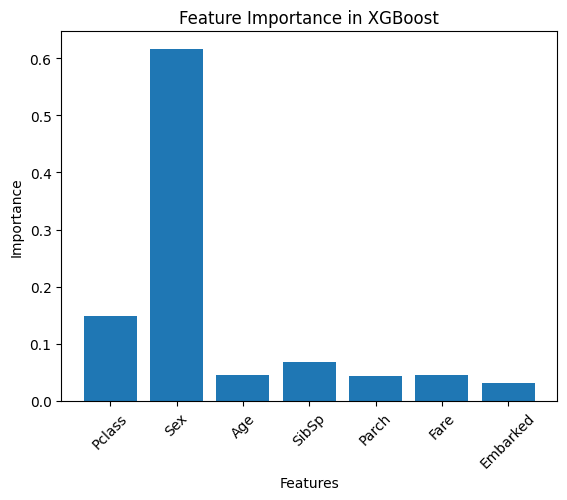

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv(r"D:\target\ml\survivalPredictionTitanic\dataset\Titanic-Dataset.csv")

# Data Preprocessing
# Drop unnecessary columns
dataset = dataset.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'])

# Encode categorical variables
dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})
dataset['Embarked'] = dataset['Embarked'].map({'C': 1, 'Q': 2, 'S': 0})

# Handle missing values
dataset = dataset.dropna()

# Define features (X) and target (Y)
X = dataset.drop(columns='Survived')
Y = dataset['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(Y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_best))

# Feature Importance
plt.bar(X.columns, best_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost')
plt.xticks(rotation=45)
plt.show()
